# SMS Spam Classifier...

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')  #using latin1 because utf-8(simple one) was not working

In [3]:
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4850,ham,Gain the rights of a wife.dont demand it.i am ...,NaN,NaN,NaN
2987,ham,Do you still have the grinder?,NaN,NaN,NaN
2407,ham,Solve d Case : A Man Was Found Murdered On &l...,NaN,NaN,NaN
3244,ham,"Its ok, if anybody asks abt me, u tel them..:-P",NaN,NaN,NaN
2296,spam,<Forwarded from 21870000>Hi - this is your Mai...,NaN,NaN,NaN
3509,ham,I just saw ron burgundy captaining a party boa...,NaN,NaN,NaN
1165,ham,"Haha yeah I see that now, be there in a sec",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
df.v1.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

## 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df['Unnamed: 2'].notna().sum()

np.int64(50)

only 50 values of this col is not null so, drop it and similary for other two col also

In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [12]:
df.columns

Index(['target', 'text'], dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder=LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [16]:
#handling missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [17]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [18]:
df.drop_duplicates(keep='first',inplace=True)  #keep=first means keep the first record and drop the other duplicates of it

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape

(5169, 2)

# 2. EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


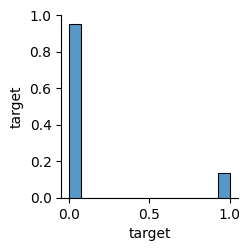

In [22]:
sns.pairplot(df) 

In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Imbalance dataset beacuse we have 0->ham message more

<Axes: xlabel='target', ylabel='count'>

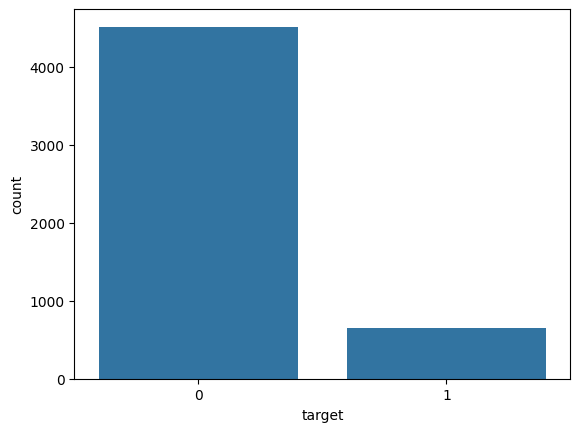

In [24]:
sns.countplot(data=df,x='target')

([<matplotlib.patches.Wedge at 0x1aa18c96120>,
 [Text(-0.42519425283422474, -1.014499801555794, 'ham'),
  Text(0.42519392226820807, 1.0144999401016135, 'spam')],
 [Text(-0.2319241379095771, -0.5533635281213422, '87.4%'),
  Text(0.23192395760084072, 0.553363603691789, '12.6%')])

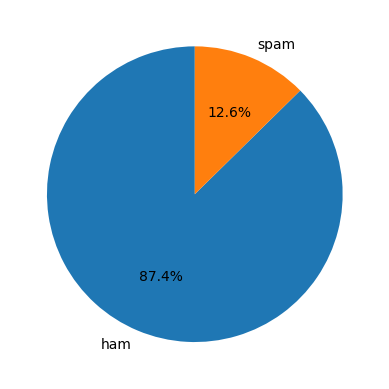

In [25]:
plt.pie(x=df['target'].value_counts(),labels=['ham','spam'],autopct='%1.1f%%',startangle=90)

Now we want to create col such as no. of char , no. of words , no. of sentences  in a message and for that we wolud be requireing nltk lib

In [26]:
import nltk

In [27]:
df['text'].apply(len)  #we would get no. of character of each message

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [28]:
df['num_char']=df['text'].apply(len)  

In [29]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
df['text'].apply(lambda x:nltk.word_tokenize(x))  #word_tokenize breaks the text into words

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [31]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['text'].apply(lambda x:nltk.sent_tokenize(x))  #sent_tokenize , this divides the text into sentences of list

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [34]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df.loc[df['target'] == 0,['num_char','num_words','num_sentences']].describe()  #stats for ham messages

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df.loc[df['target'] == 1,['num_char','num_words','num_sentences']].describe()  #stats for spam messages

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


looking from the stats of both the messages : ham messages are shorter than spam as they conatin on an average less no. of words,char,sentences

In [39]:
df.loc[df['target'] == 0,'num_char']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_char, Length: 4516, dtype: int64

<Axes: xlabel='num_char', ylabel='Count'>

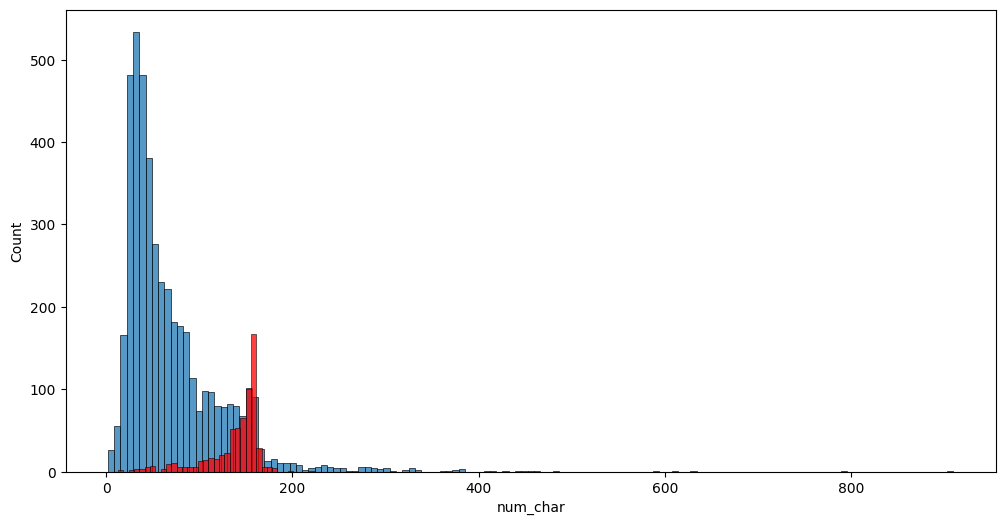

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df.loc[df['target'] == 0,'num_char'])
sns.histplot(df.loc[df['target'] == 1,'num_char'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

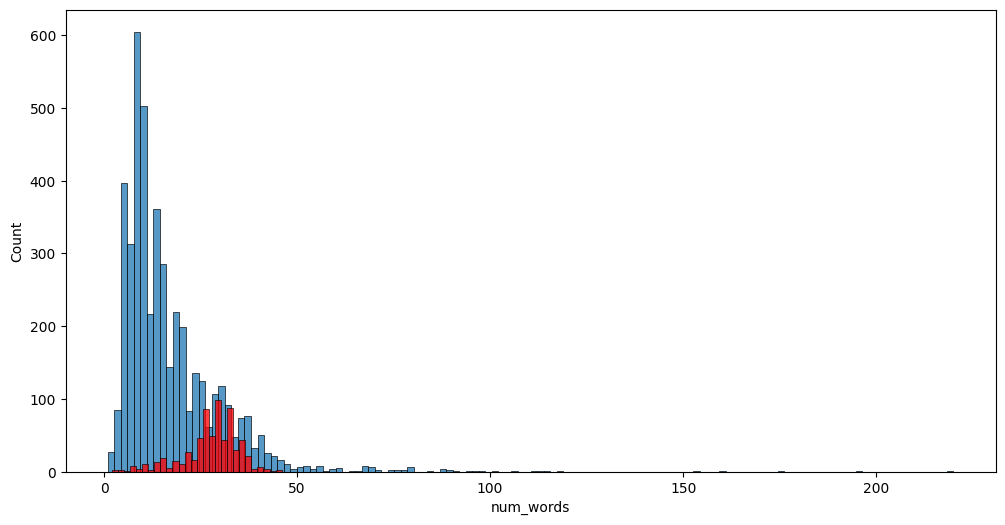

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df.loc[df['target'] == 0,'num_words'])
sns.histplot(df.loc[df['target'] == 1,'num_words'],color='red')

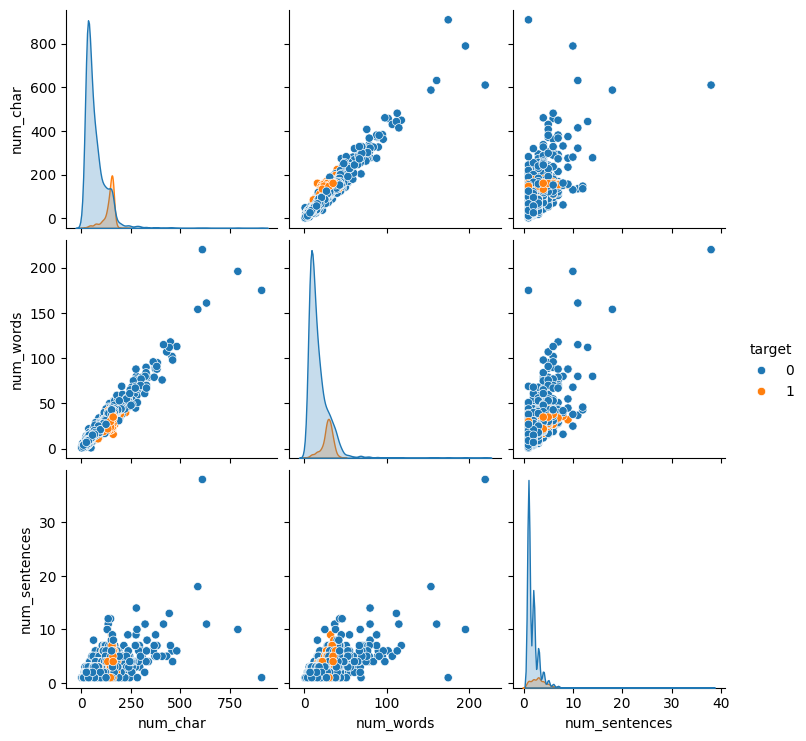

In [42]:
sns.pairplot(df,hue='target')

In [43]:
cor=df.drop('text',axis=1).corr()
cor

,target,num_char,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

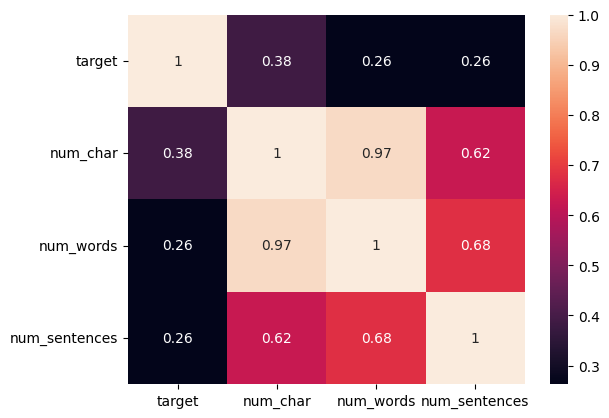

In [44]:
sns.heatmap(cor,annot=True)

there exist multicollinearity between the independent col ,so we need to do feature selection(need to take one col out of three)

## 3. Text Preprocessing 

Steps in the function:-

Lower case

Tokenization - breaking the text into word

Removing special characters

Removing stop words and punctuation

Stemming - dance , dancing ,danced all are converted to danc

In [45]:
nltk.word_tokenize('hi how are you')

['hi', 'how', 'are', 'you']

In [46]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [47]:
from nltk.corpus import stopwords
stopwords.words('english')  # stopwords in english are the words that are not important in building the model words like is,are,to etc

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [48]:
import string
string.punctuation  #conatins all puntuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [49]:
# Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')  #eg

'danc'

In [50]:
def transform_text(text):
    text=text.lower()  #converting the text into lower case
    
    text=nltk.word_tokenize(text)  #word_tokenize break the text into words and make a list out of it
    
    L=[]
    for i in text:
        if i.isalnum():    # if the word is alphabet or numeric or both then
            L.append(i)

    y=[]
    for i in L:
        if i not in stopwords.words('english') and i not in string.punctuation: # the word sholud not be a stopword and niether a puntuations then
            y.append(i)

    x=[]
    for i in y:
        x.append(ps.stem(i))
            
    return x

In [51]:
transform_text('Hi how are you Aman? 100 dancing') #eg 

['hi', 'aman', '100', 'danc']

In [52]:
df['transformed_text'] = df['text'].apply(transform_text)

In [53]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [54]:
df['transformed_text']=df['transformed_text'].apply(lambda x:' '.join(x))  #converting the list into string

In [55]:
df[['text','transformed_text']]

,text,transformed_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,2nd time tri 2 contact u pound prize 2 claim e...
5568,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [56]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
# Intisilazing wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [58]:
# creating wordclould for spam messages
spam_wc = wc.generate(df.loc[df['target'] == 1, 'transformed_text'].astype(str).str.cat(sep=" "))

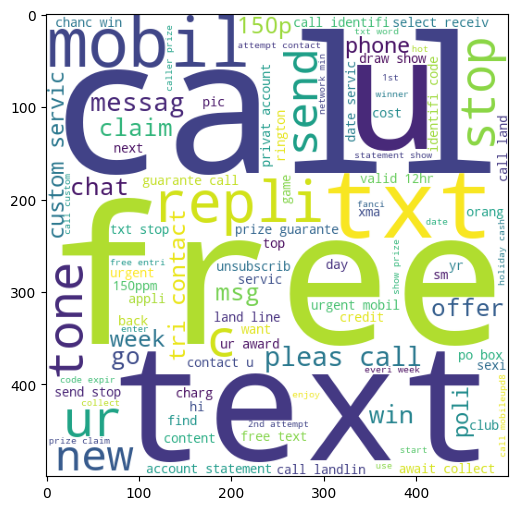

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

most frequent words in spam messages

In [60]:
# creating wordclould for ham messages
ham_wc = wc.generate(df.loc[df['target'] == 0, 'transformed_text'].astype(str).str.cat(sep=" "))

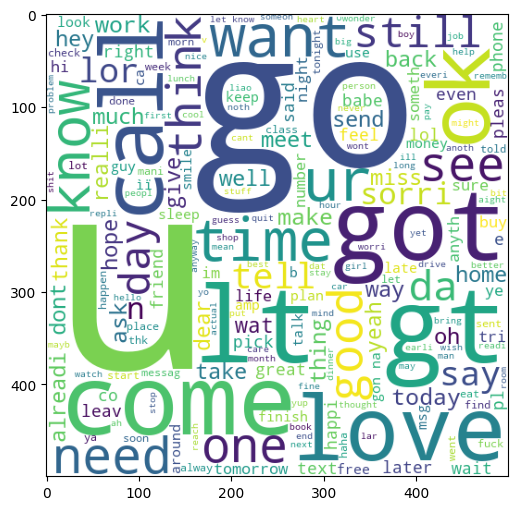

In [61]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

most frequent words in ham messages

In [62]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [63]:
df[df['target']==1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [64]:
df[df['target'] == 1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [65]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [66]:
len(spam_corpus)  #no . of words in spam messages

9939

C:\Users\KSHITIJ\AppData\Local\Temp\ipykernel_10200\3173337745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='pastel')


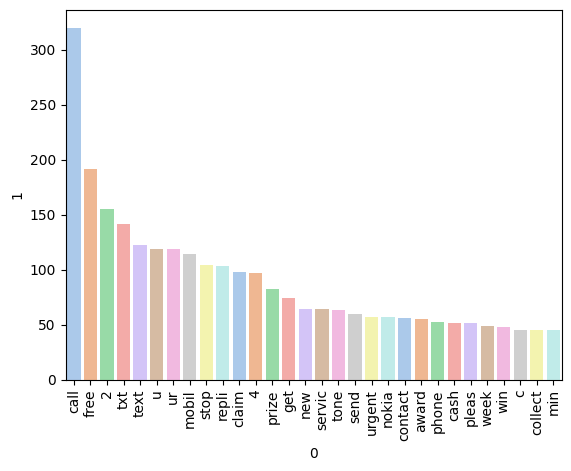

In [67]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],palette='pastel')
plt.xticks(rotation='vertical')
plt.show()

most common top 30 words in spam messages

In [68]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [69]:
len(ham_corpus)  #no . of words in ham messages

35404

C:\Users\KSHITIJ\AppData\Local\Temp\ipykernel_10200\2317362023.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='pastel')


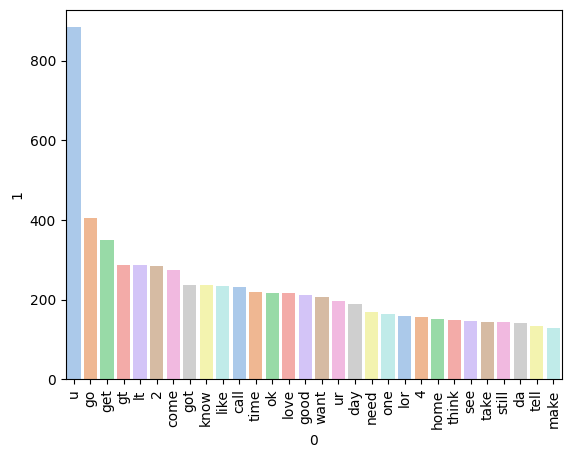

In [70]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],palette='pastel')
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

Spam Classification is a Supervised Classificaion Problem

#### Vectorization (Bag of Words)

In [71]:
df.shape

(5169, 6)

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [73]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [74]:
X  # indpendent feature

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [75]:
X.shape   #5169 messages  and 6708 most used words

(5169, 6708)

In [76]:
y=df['target'].values  #independent feature

In [77]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [78]:
#diving the data into train and test
from sklearn.model_selection import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

Applying different Classification Models

In [80]:
#using Naive Bayes
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,roc_auc_score

In [81]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

in spam classifier performance metrics like precision is more accountable than accuracy

In [82]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723897911832946
[[991 139]
 [ 26 137]]
0.4963768115942029


In [83]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9659706109822119
[[1102   28]
 [  16  147]]
0.84


In [84]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9698375870069605
[[1127    3]
 [  36  127]]
0.9769230769230769


the best model is BernoulliNB as it has the higest precision

In [85]:
#using all other classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier  #similar to Random Forest
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [86]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [87]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'BNB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [88]:
#function to train and predict the outputs for different models
def train_classifier(mdl,X_train,y_train,X_test,y_test):  #mdl is model variable
    mdl.fit(X_train,y_train)
    y_pred = mdl.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [89]:
train_classifier(svc,X_train,y_train,X_test,y_test)  #for eg

(0.9249806651198763, 0.6964285714285714)

In [90]:
accuracy_scores = []
precision_scores = []

# doing for each model
for name,mdl in clfs.items():
    
    current_accuracy,current_precision = train_classifier(mdl, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    print(end='\n')

For  SVC
Accuracy -  0.9249806651198763
Precision -  0.6964285714285714

For  KN
Accuracy -  0.9110595514307811
Precision -  1.0

For  BNB
Accuracy -  0.9698375870069605
Precision -  0.9769230769230769

For  DT
Accuracy -  0.9296210363495746
Precision -  0.95

For  LR
Accuracy -  0.9729311678267595
Precision -  0.9776119402985075

For  RF
Accuracy -  0.9729311678267595
Precision -  1.0

For  AdaBoost
Accuracy -  0.9249806651198763
Precision -  0.9459459459459459

For  ETC
Accuracy -  0.9760247486465584
Precision -  0.9925373134328358

For  GBDT
Accuracy -  0.9489559164733179
Precision -  0.9532710280373832

For  xgb
Accuracy -  0.9706109822119103
Precision -  0.9699248120300752



Random Forest is the best algo for the df not using KNN because it is not reliable to outliers

In [91]:
dict1={'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}

In [92]:
performance_df = pd.DataFrame(dict1).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911060,1.000000
5,RF,0.972931,1.000000
7,ETC,0.976025,0.992537
4,LR,0.972931,0.977612
2,BNB,0.969838,0.976923
9,xgb,0.970611,0.969925
8,GBDT,0.948956,0.953271
3,DT,0.929621,0.950000
6,AdaBoost,0.924981,0.945946
0,SVC,0.924981,0.696429


Random Forest as its Precision and Accuracy both are highest

## 5. Improving Model

### HyperParamter Tuning

doing Hyperparameter tuning on all the models or algos

In [93]:
models = {
    'SVC' : svc,
    'KNN' : knc, 
    'BNB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model
    
# Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    print('----------------------------------')

    
    print('='*35)
    print('\n')

SVC
Model performance for Test set
- Accuracy: 0.9250
- F1 score: 0.9255
- Precision: 0.6964
- Recall: 0.7178
- Roc Auc Score: 0.8363
----------------------------------


KNN
Model performance for Test set
- Accuracy: 0.9111
- F1 score: 0.8890
- Precision: 1.0000
- Recall: 0.2945
- Roc Auc Score: 0.6472
----------------------------------


BNB
Model performance for Test set
- Accuracy: 0.9698
- F1 score: 0.9684
- Precision: 0.9769
- Recall: 0.7791
- Roc Auc Score: 0.8882
----------------------------------


DT
Model performance for Test set
- Accuracy: 0.9273
- F1 score: 0.9164
- Precision: 0.9259
- Recall: 0.4601
- Roc Auc Score: 0.7274
----------------------------------


LR
Model performance for Test set
- Accuracy: 0.9729
- F1 score: 0.9718
- Precision: 0.9776
- Recall: 0.8037
- Roc Auc Score: 0.9005
----------------------------------


RF
Model performance for Test set
- Accuracy: 0.9729
- F1 score: 0.9715
- Precision: 1.0000
- Recall: 0.7853
- Roc Auc Score: 0.8926
--------------

In [94]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, 13, 10],
             "max_features": [5, 7, 10, 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}
rf_params

{'max_depth': [5, 8, 15, 13, 10],
 'max_features': [5, 7, 10, 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [95]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                  ]

randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, 13, 10],
   'max_features': [5, 7, 10, 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [96]:
#using RadomizedCV for Hyper parameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=20,
                                   cv=2,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 2 folds for each of 20 candidates, totalling 40 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 20, 'max_features': 5, 'max_depth': 15}


In [97]:
# setting the hyperparameter according to the Tuning
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=20,
                                          max_features=5,max_depth=15)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

# Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc

print(list(models.keys())[i])

    
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

print('----------------------------------')




Random Forest
Model performance for Test set
- Accuracy: 0.9613
- F1 score: 0.9582
- Precision: 1.0000
- Recall: 0.6933
- Roc Auc Score: 0.8466
----------------------------------


the accuracy has decreased in Random Forest after HyperParameter Tuning

#### Doing Hyperparameter Tuning for all best models

applying the same above code

In [98]:
rf_params = {"max_depth": [5, 8, 15, 13, 10],
             "max_features": [5, 7, 10, 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [99]:
lr_params={
    "penalty": ["l1","l2"],      # Type of regularization
    "C": [0.001, 0.01, 0.1, 1, 10, 100],              # Inverse of regularization strength
    "solver": ["liblinear", "saga"],  # Optimization algorithms
    "max_iter": [100, 200, 500, 1000]                 # Max number of iterations
}

In [100]:
knn_params = {
    "n_neighbors": [3, 5, 7, 9, 11, 15, 21],           # Number of neighbors to use
    "weights": ["uniform", "distance"],               # Uniform = equal weight, distance = closer neighbors weigh more
    "metric": ["euclidean", "manhattan"],# Distance metrics
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]  # Search algorithms
}

In [101]:
bnb_params = {
    "alpha": [0.0, 0.01, 0.1, 0.5, 1.0, 10.0],         # Additive (Laplace/Lidstone) smoothing
    "binarize": [0.0, 0.1, 0.5, 1.0, 2.0],            # Threshold for binarizing features
    "fit_prior": [True, False]                        # Whether to learn class prior probabilities
}

NOTE: ENSURE THAT ALL THE COMBINATIONS OF THE PARAMETER ARE VALID FOR RANDOMIZED CV

In [102]:
rf_params

{'max_depth': [5, 8, 15, 13, 10],
 'max_features': [5, 7, 10, 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [103]:
lr_params

{'penalty': ['l1', 'l2'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'solver': ['liblinear', 'saga'],
 'max_iter': [100, 200, 500, 1000]}

In [104]:
knn_params

{'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
 'weights': ['uniform', 'distance'],
 'metric': ['euclidean', 'manhattan'],
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [105]:
bnb_params

{'alpha': [0.0, 0.01, 0.1, 0.5, 1.0, 10.0],
 'binarize': [0.0, 0.1, 0.5, 1.0, 2.0],
 'fit_prior': [True, False]}

In [106]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params),
                   ('LR', LogisticRegression(), lr_params),
                   ('KNN', KNeighborsClassifier(), knn_params),
                   ('NB', BernoulliNB(),bnb_params)
                  ]

randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, 13, 10],
   'max_features': [5, 7, 10, 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('LR',
  LogisticRegression(),
  {'penalty': ['l1', 'l2'],
   'C': [0.001, 0.01, 0.1, 1, 10, 100],
   'solver': ['liblinear', 'saga'],
   'max_iter': [100, 200, 500, 1000]}),
 ('KNN',
  KNeighborsClassifier(),
  {'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
   'weights': ['uniform', 'distance'],
   'metric': ['euclidean', 'manhattan'],
   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
 ('NB',
  BernoulliNB(),
  {'alpha': [0.0, 0.01, 0.1, 0.5, 1.0, 10.0],
   'binarize': [0.0, 0.1, 0.5, 1.0, 2.0],
   'fit_prior': [True, False]})]

In [108]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=5,
                                   cv=2,
                                   verbose=1,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\KSHITIJ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Fitting 2 folds for each of 10 candidates, totalling 20 fits
---------------- Best Params for RF -------------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_features': 5, 'max_depth': 10}
---------------- Best Params for LR -------------------
{'solver': 'saga', 'penalty': 'l1', 'max_iter': 200, 'C': 100}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 3, 'metric': 'euclidean', 'algorithm': 'ball_tree'}
---------------- Best Params for NB -------------------
{'fit_prior': True, 'binarize': 0.0, 'alpha': 0.5}


In [138]:
# setting the hyperparameter according to the Tuning(best_params)
models={
    # filling up the best parameters
    "Random Forest":RandomForestClassifier(n_estimators=500,min_samples_split=8,
                                         max_features=5,max_depth=10),
    "Logistic Regression": LogisticRegression(solver='saga',penalty='l1',C=100),
    "KNN": KNeighborsClassifier(n_neighbors=3,weights='distance',metric='euclidean',algorithm='ball_tree'),
    'Naive Bayes': BernoulliNB(alpha=0.5,binarize=0.0,fit_prior=True)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

# Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred,zero_division=1) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall

    print(list(models.keys())[i])

    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))

    print('----------------------------------')

    print('='*35)
    print('\n')

Random Forest
Model performance for Test set
- Accuracy: 0.8739
- F1 score: 0.8151
- Precision: 1.0000
- Recall: 0.0000
----------------------------------




C:\Users\KSHITIJ\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression
Model performance for Test set
- Accuracy: 0.9791
- F1 score: 0.9784
- Precision: 0.9928
- Recall: 0.8405
----------------------------------


KNN
Model performance for Test set
- Accuracy: 0.9265
- F1 score: 0.9129
- Precision: 1.0000
- Recall: 0.4172
----------------------------------


Naive Bayes
Model performance for Test set
- Accuracy: 0.9814
- F1 score: 0.9814
- Precision: 0.9317
- Recall: 0.9202
----------------------------------




#### Essemble Bagging Models

Voting Classifier

In [115]:
from sklearn.ensemble import VotingClassifier

In [116]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [117]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [118]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [120]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9822119102861562
Precision 0.972972972972973


Stacking Classifier (It is also a bagging algo but different from voting classifier)

In [121]:
from sklearn.ensemble import StackingClassifier
# Define base estimators  are 0 level model
base_estimators = [
    ('dt', DecisionTreeClassifier()),
    ('svc', MultinomialNB())  # SVC must have probability=True for stacking
]

# Define final estimator are level 1 model which takens input from the prediction done by base model and  then do the final prediction
final_estimator = LogisticRegression()

# Create the stacking classifier
clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

In [122]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9791183294663574
Precision 0.9415584415584416


Bagging Classifier (here all the models are Decision Tree)

In [127]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=20, random_state=2)  #using 20 base models

In [128]:
bc.fit(X_train,y_train)
y_pred = bc.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9644238205723125
Precision 0.9398496240601504


out of the three bagging models , Voting Classifier is the best but not good as RF

## FINAL MODEL

In [130]:
RFC = RandomForestClassifier(n_estimators=50, random_state=2)
RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.974477958236659
Precision 1.0


the best model is Random Forest so far so RFC is the model

In [ ]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(RFC,open('model.pkl','wb'))

In [162]:
#example
input_sms = "Your registration is confirmed. We look forward to welcoming you to the course starting on mon."

# 1. preprocess
transformed_sms = transform_text(input_sms)            # likely returns a list of words
transformed_sms_str = " ".join(transformed_sms)        # join tokens(words) back to string for vectorizer

# 2. vectorize
vector_input = cv.transform([transformed_sms_str])     # transforms the list of strings into vectors

# 3. predict
result = RFC.predict(vector_input)                      # predict returns an array

# 4. Display Result
if result == 1:
    print('Spam')
else:
    print('Not Spam')


Not Spam


In [151]:
transformed_sms

['final',
 'notic',
 'pay',
 'overdu',
 'bill',
 'immedi',
 'face',
 'legal',
 'action']

In [ ]:
transformed_sms_str

In [133]:
[transformed_sms_str]

['call regard cours want appli 100']

In [134]:
vector_input

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 6708)>

In [135]:
result

array([1])